# Air Quality Forecast: Machine Learning Model

### Name : Ashish Mishra & Kuldeep Maurya
Team Details : CU_CP_Team_8563

### Description : 
    This project predicts the Air Quality Index (AQI) using pollutant data like PM2.5, PM10, NOx, NH3, CO, SO2, O3, and volatile organic compounds. By analyzing historical trends, the model forecasts AQI values to assist in issuing health alerts, formulating policies, and optimizing industrial and traffic management.

![AQI Mini Image](https://www.deq.ok.gov/wp-content/uploads/air-division/aqi_mini-768x432.png)



    Our model predicts future AQI values based on the levels of various pollutants that affect air quality. These predictions assist decision-makers in issuing health alerts, formulating environmental policies, optimizing traffic and industrial management, and helping the general public plan their daily activities.


#### Key Challenges:

    Missing data in pollutant and AQI values.
    Seasonal variations impacting trends.
    Data standardization for consistent unit representation.

#### Machine Learning Models Used:
    We applied various models, including Linear Regression, K-Nearest Neighbors (KNN),Decision Tree, and Random Forest, to determine which provides the highest accuracy for AQI prediction.

### Importing necessary libraries

In [1]:

import numpy as np              # Numerical computations and linear algebra
import pandas as pd             # Data operations 

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns

import datetime
from warnings import filterwarnings
filterwarnings('ignore')

# Machine learning libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


### Loading and Analyzing the Health Care Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Ashish Mishra\OneDrive\Desktop\Code Unnati Program\air quality data.csv')

In [3]:
df.head()     # shows first 5 records

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.tail()     # shows last 5 records

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [5]:
df.shape      # shape (number of rows and columns) of the dataset

(29531, 16)

In [6]:
df.info()     # summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
missing_values = df.isnull().sum()       # count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [8]:
df.duplicated().sum()         # duplicate rows in the dataset and count them

0

The 'AQI' column is essential for analysis and prediction. Missing AQI values would impact model accuracy and predictions. Removing rows with missing AQI values ensures the dataset remains clean and reliable for accurate analysis.

In [9]:
df1 = df.dropna(subset=['AQI'], inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [11]:
df.shape

(24850, 16)

In [12]:
df.describe().T       # summary statistics of Dataset

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [13]:
# Calculate the percentage of missing values 
null_values_percentage = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)
print("Percentage of missing values per column:")
print(null_values_percentage)


Percentage of missing values per column:
Xylene        61.86
PM10          28.52
NH3           26.30
Toluene       23.44
Benzene       14.23
NOx            7.47
O3             3.25
PM2.5          2.73
SO2            2.43
CO             1.79
NO2            1.57
NO             1.56
City           0.00
Date           0.00
AQI            0.00
AQI_Bucket     0.00
dtype: float64


#### Missing Values Analysis and Handling
    Xylene: Has the highest percentage of missing values (61.86%). The feature is removed to simplify the analysis.
    PM10 and NH3: Have significant missing data (around 28-26%).
    City, Date, AQI, AQI_Bucket: These columns have no missing values (0%).

### Data Exploration with Visualization: Univariate Analysis for Each Feature

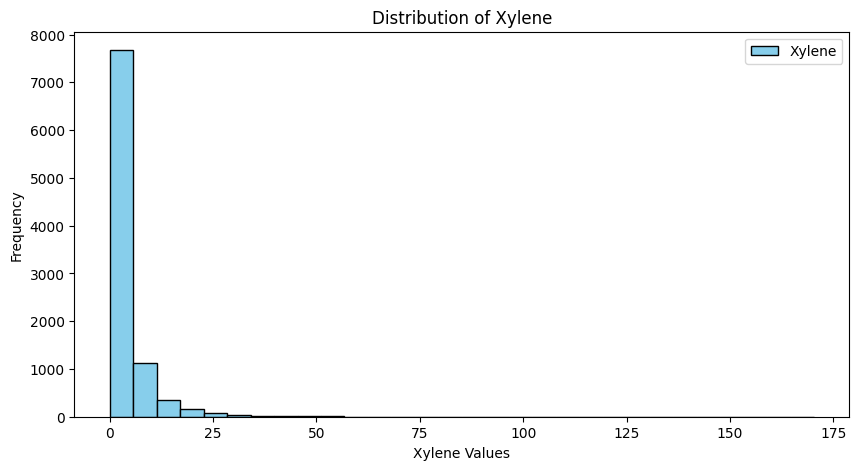

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df['Xylene'], bins= 30, color='skyblue', edgecolor='black')
plt.title('Distribution of Xylene')
plt.xlabel('Xylene Values')
plt.ylabel('Frequency')
plt.legend(['Xylene'])
plt.show()

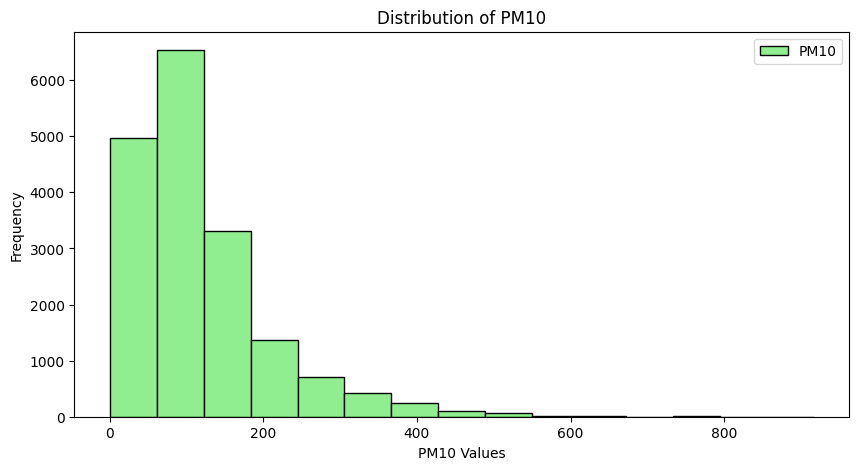

In [15]:

plt.figure(figsize=(10, 5))
plt.hist(df['PM10'], bins= 15, color='lightgreen', edgecolor='black')
plt.title('Distribution of PM10')
plt.xlabel('PM10 Values')
plt.ylabel('Frequency')

plt.legend(['PM10'])
plt.show()


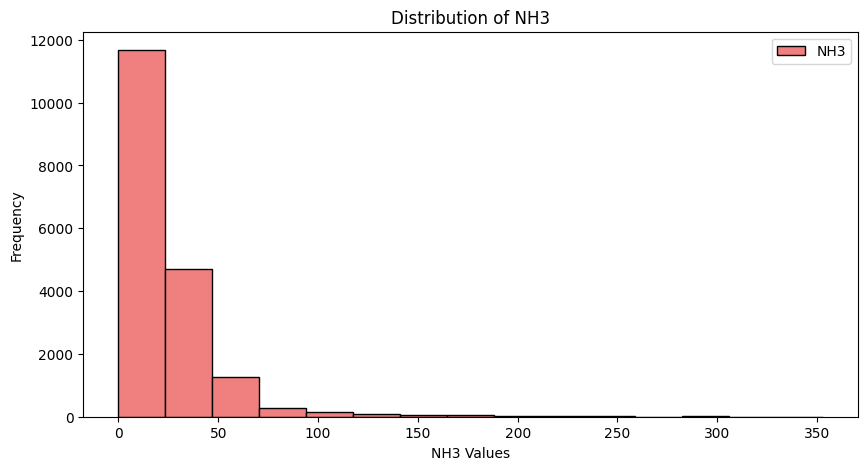

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(df['NH3'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Distribution of NH3')
plt.xlabel('NH3 Values')
plt.ylabel('Frequency')
plt.legend(['NH3'])
plt.show()


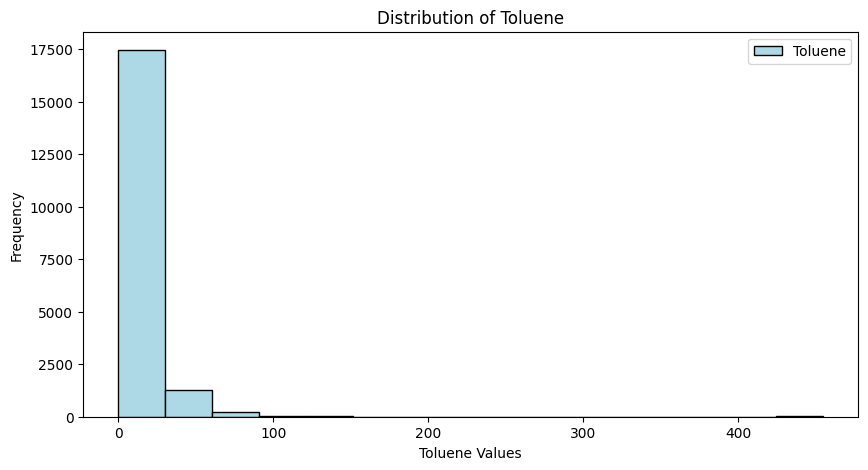

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(df['Toluene'], bins=15, color='lightblue', edgecolor='black')
plt.title('Distribution of Toluene')
plt.xlabel('Toluene Values')
plt.ylabel('Frequency')
plt.legend(['Toluene'])
plt.show()


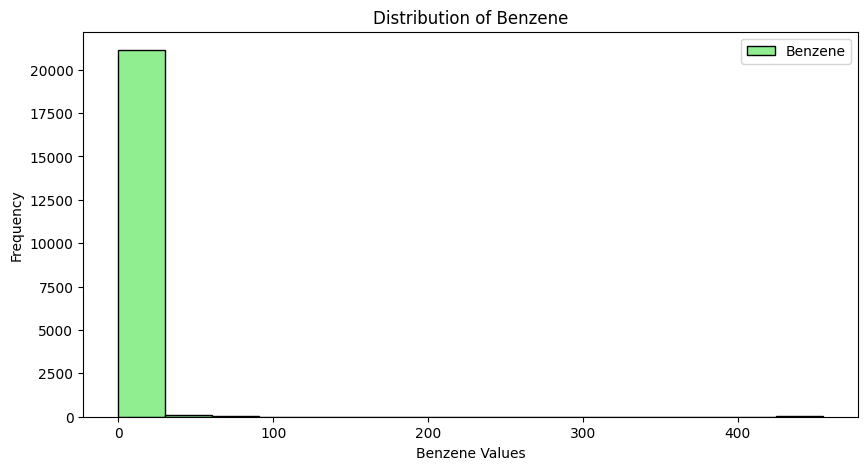

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(df['Benzene'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Benzene')
plt.xlabel('Benzene Values')
plt.ylabel('Frequency')
plt.legend(['Benzene'])
plt.show()


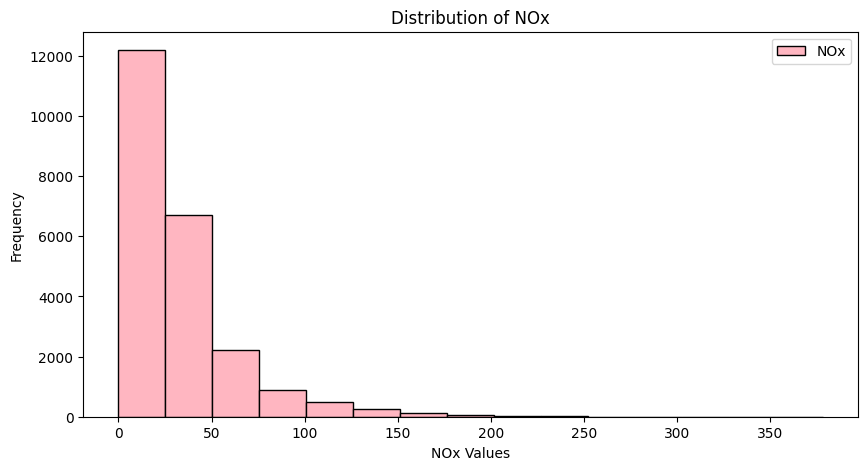

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(df['NOx'], bins=15, color='lightpink', edgecolor='black')
plt.title('Distribution of NOx')
plt.xlabel('NOx Values')
plt.ylabel('Frequency')
plt.legend(['NOx'])
plt.show()


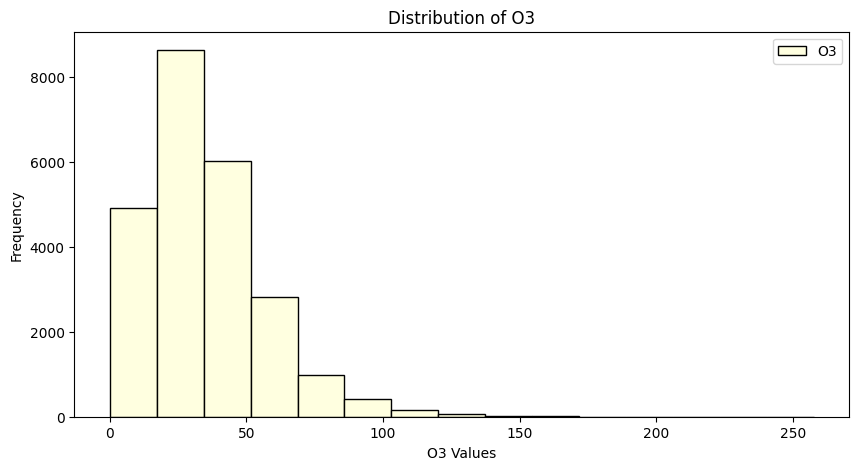

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(df['O3'], bins=15, color='lightyellow', edgecolor='black')
plt.title('Distribution of O3')
plt.xlabel('O3 Values')
plt.ylabel('Frequency')
plt.legend(['O3'])
plt.show()


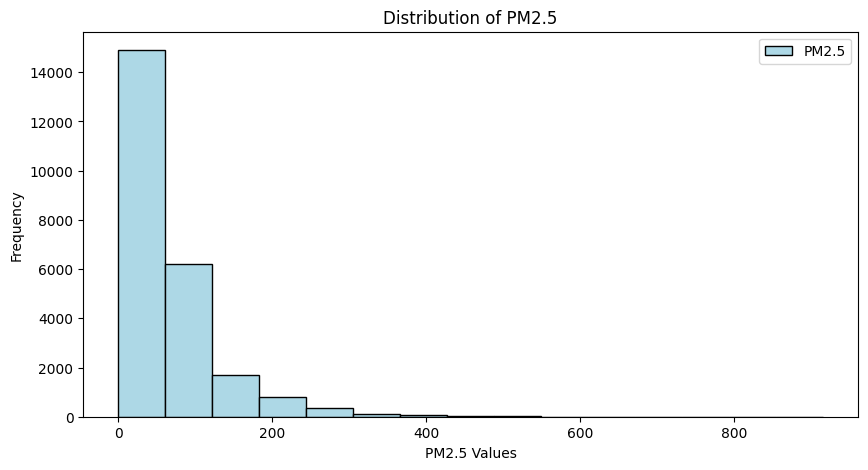

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(df['PM2.5'], bins=15, color='lightblue', edgecolor='black')
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 Values')
plt.ylabel('Frequency')
plt.legend(['PM2.5'])
plt.show()


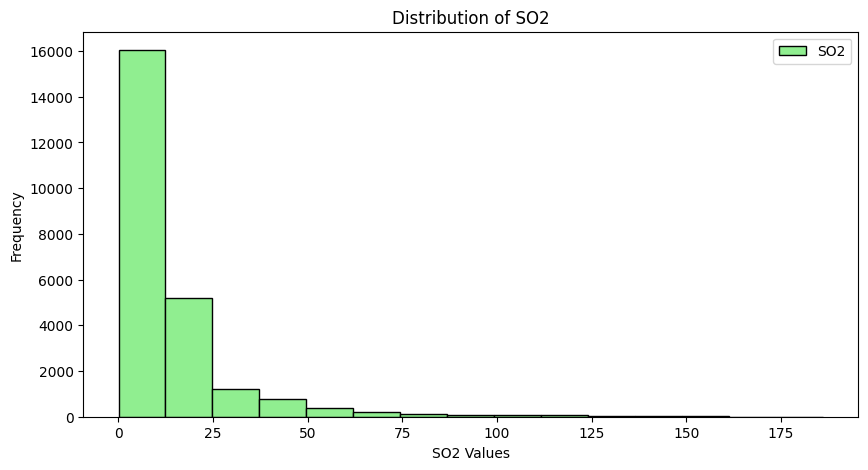

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(df['SO2'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of SO2')
plt.xlabel('SO2 Values')
plt.ylabel('Frequency')
plt.legend(['SO2'])
plt.show()


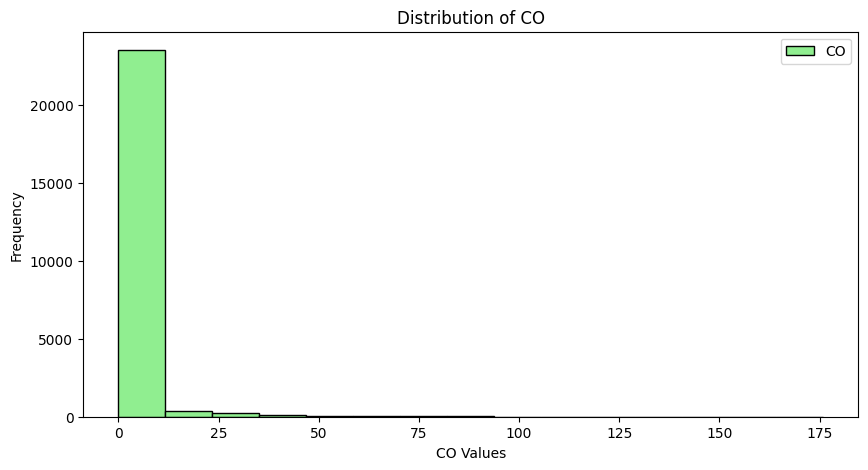

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(df['CO'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of CO')
plt.xlabel('CO Values')
plt.ylabel('Frequency')
plt.legend(['CO'])
plt.show()


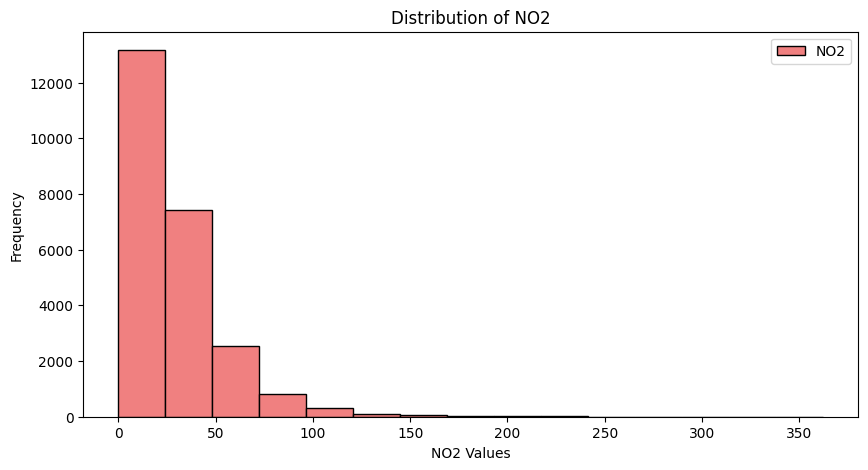

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(df['NO2'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Distribution of NO2')
plt.xlabel('NO2 Values')
plt.ylabel('Frequency')
plt.legend(['NO2'])
plt.show()


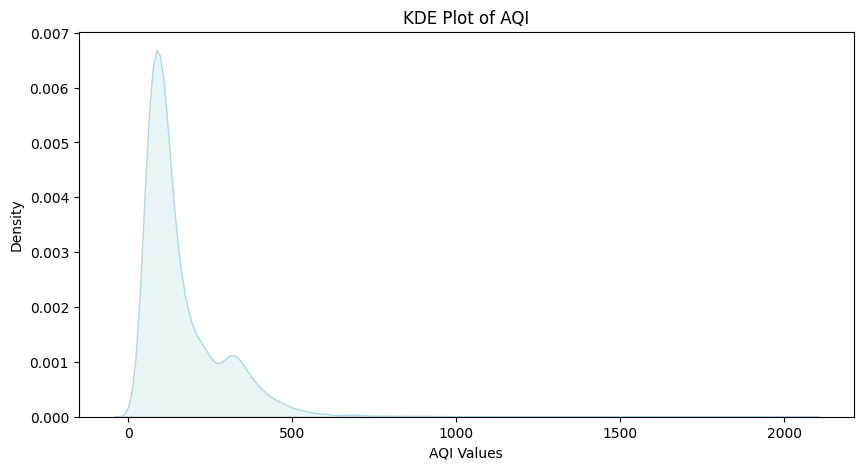

In [25]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['AQI'].dropna(), shade=True, color='lightblue')
plt.title('KDE Plot of AQI')
plt.xlabel('AQI Values')
plt.ylabel('Density')
plt.show()


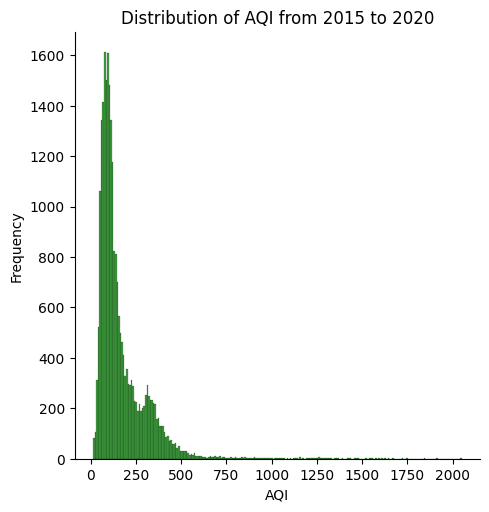

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
# Filter data for the years 2015-2020
df_filtered = df[(df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2020)]
sns.displot(df_filtered, x="AQI", color="green")
plt.title('Distribution of AQI from 2015 to 2020')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


### Bivariate analysis
In the following plot, we observe the frequency of various city types across the entire dataset, which will be analyzed through Bivariate analysis.

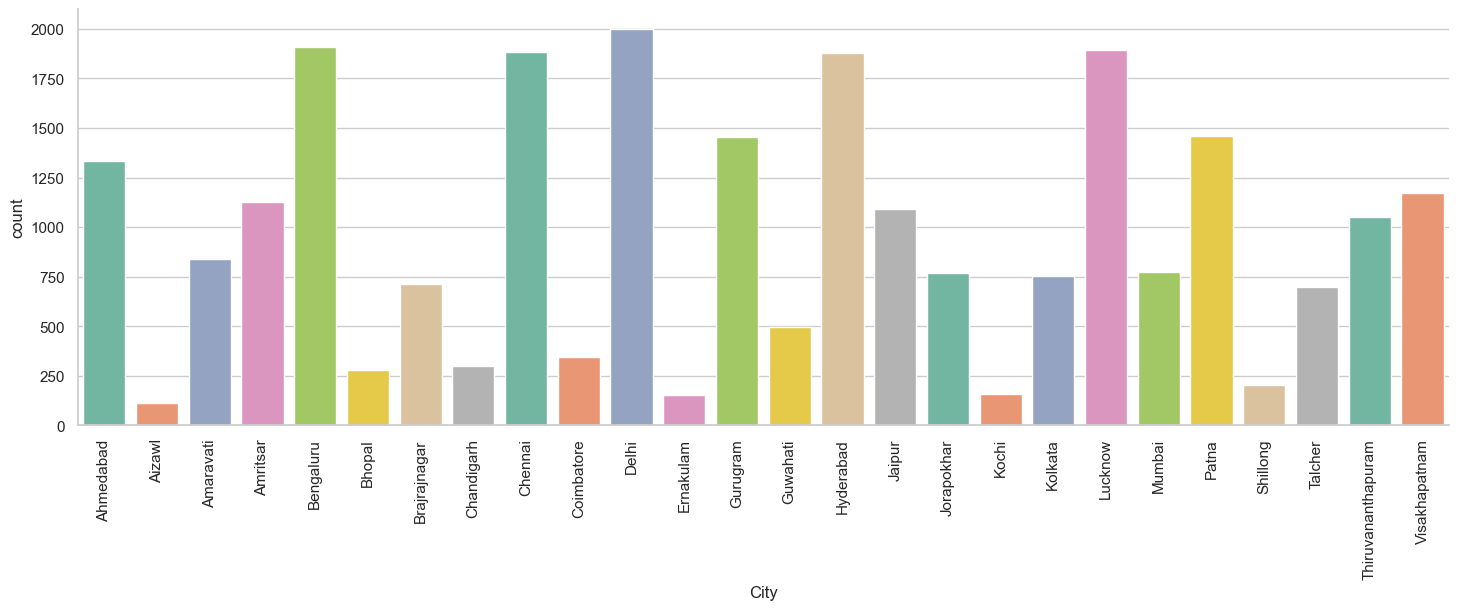

In [27]:
sns.set(style="whitegrid")
sns.catplot(x="City", kind="count", data=df, height=5, aspect=3, palette="Set2").set_xticklabels(rotation=90)


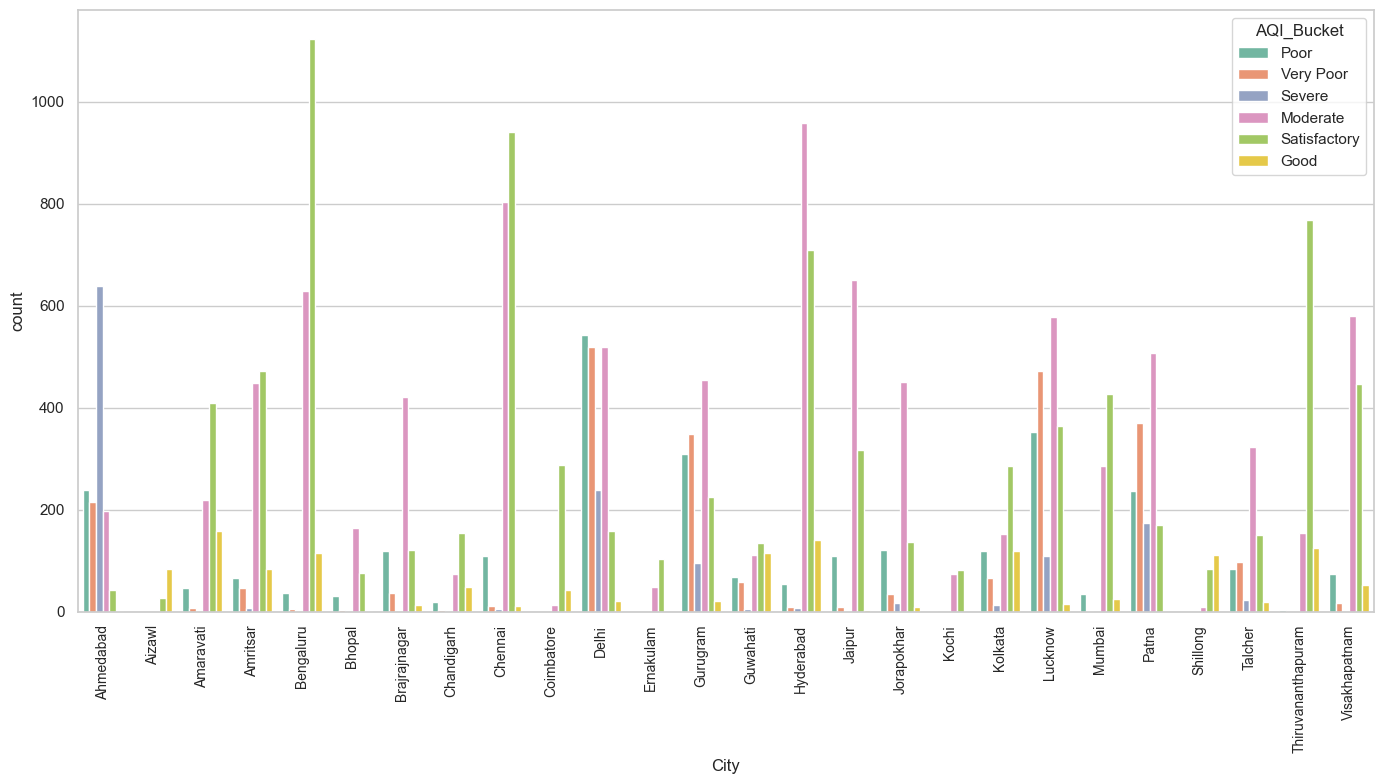

In [28]:
plt.figure(figsize=(14, 8))  
sns.countplot(data=df, x="City", hue="AQI_Bucket", palette="Set2")
plt.xticks(rotation=90, fontsize=10)  
plt.tight_layout()  
plt.show()


The bar plot above shows the distribution of different cities across various AQI categories, including 'Good,' 'Satisfactory,' 'Moderate,' 'Poor,' 'Very Poor,' and 'Severe.' Each city’s frequency is displayed within each AQI bucket, helping us understand how cities are spread across different air quality levels.

The following sequence of boxplots illustrates the distribution of numerical variables (non-null values) across different cities. These plots help visualize the spread, central tendency, and presence of any outliers in the data for each city.

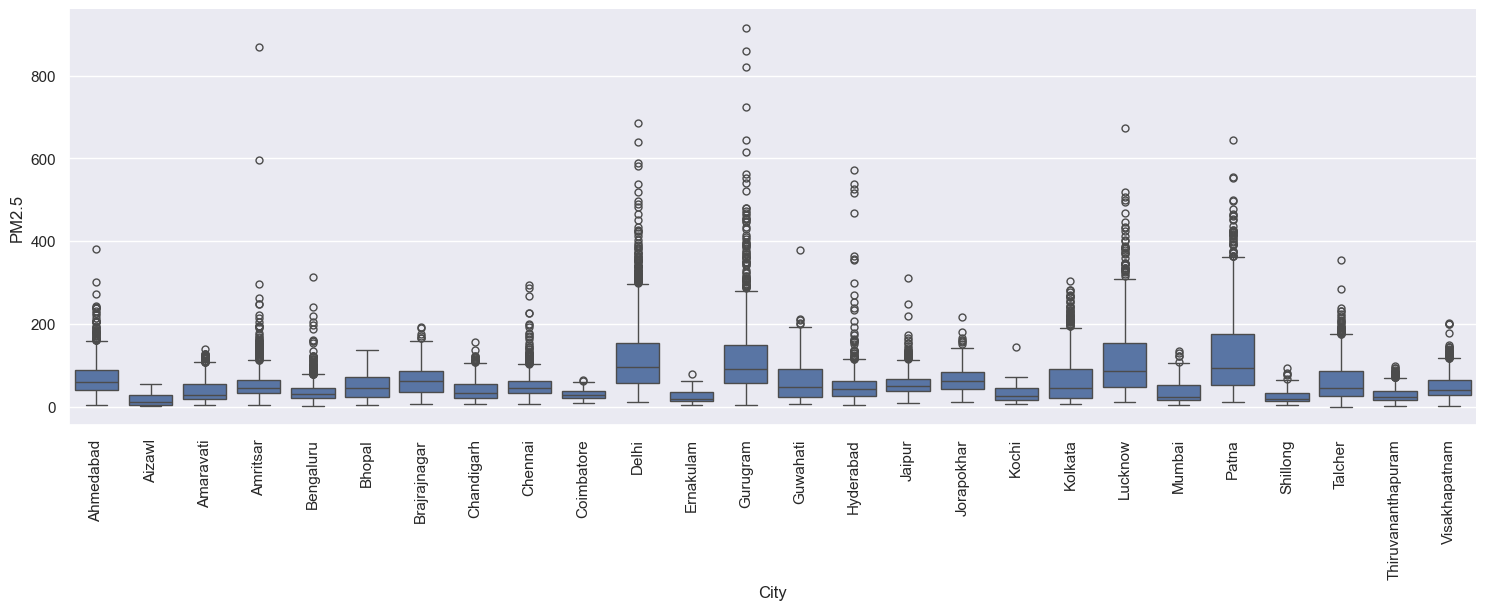

In [29]:
sns.set_style("darkgrid")
sns.catplot(x="City", y="PM2.5", kind="box", data=df, height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

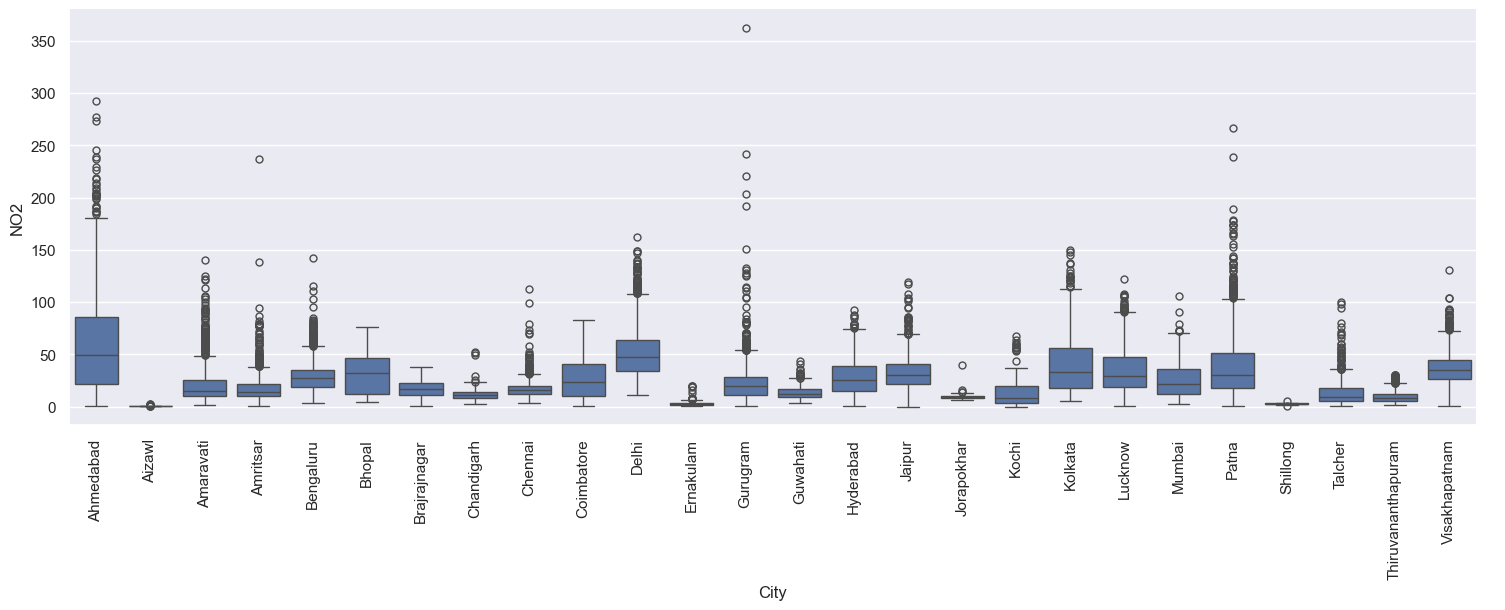

In [30]:
sns.set_style("darkgrid")
sns.catplot(x="City", y="NO2", kind="box", data=df, height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

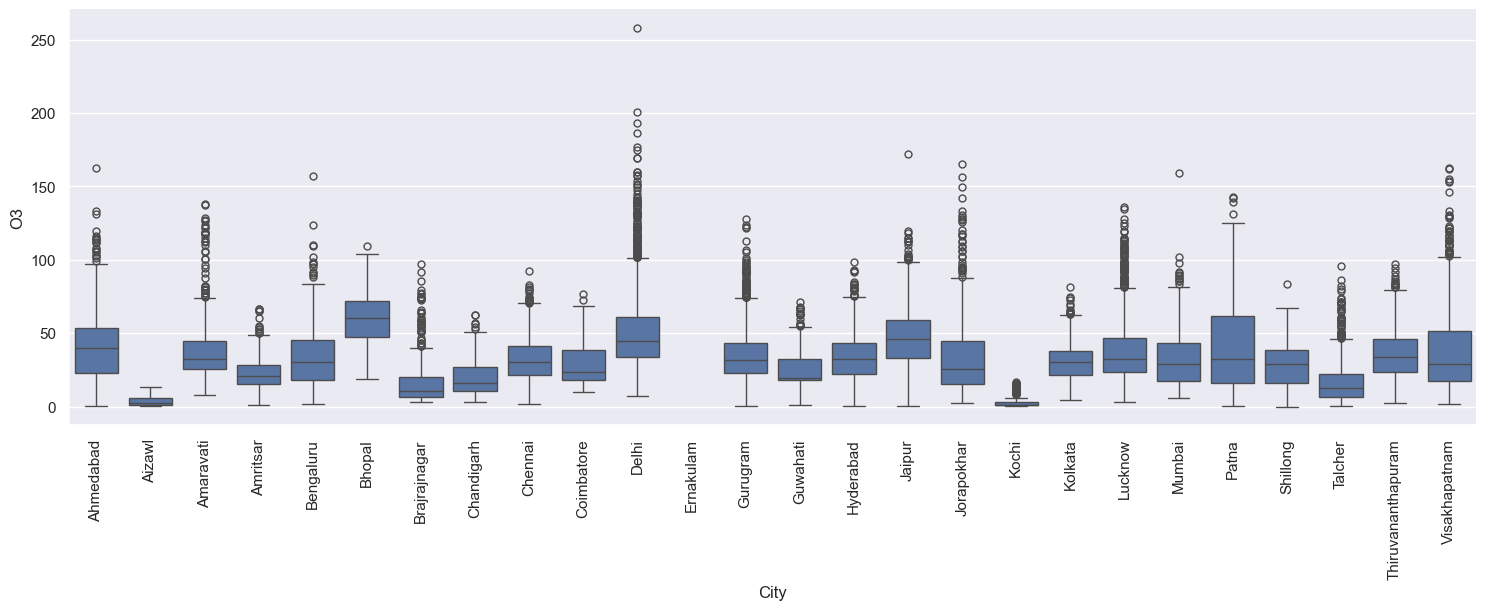

In [31]:
sns.set_style("darkgrid")
sns.catplot(x="City", y="O3", kind="box", data=df, height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

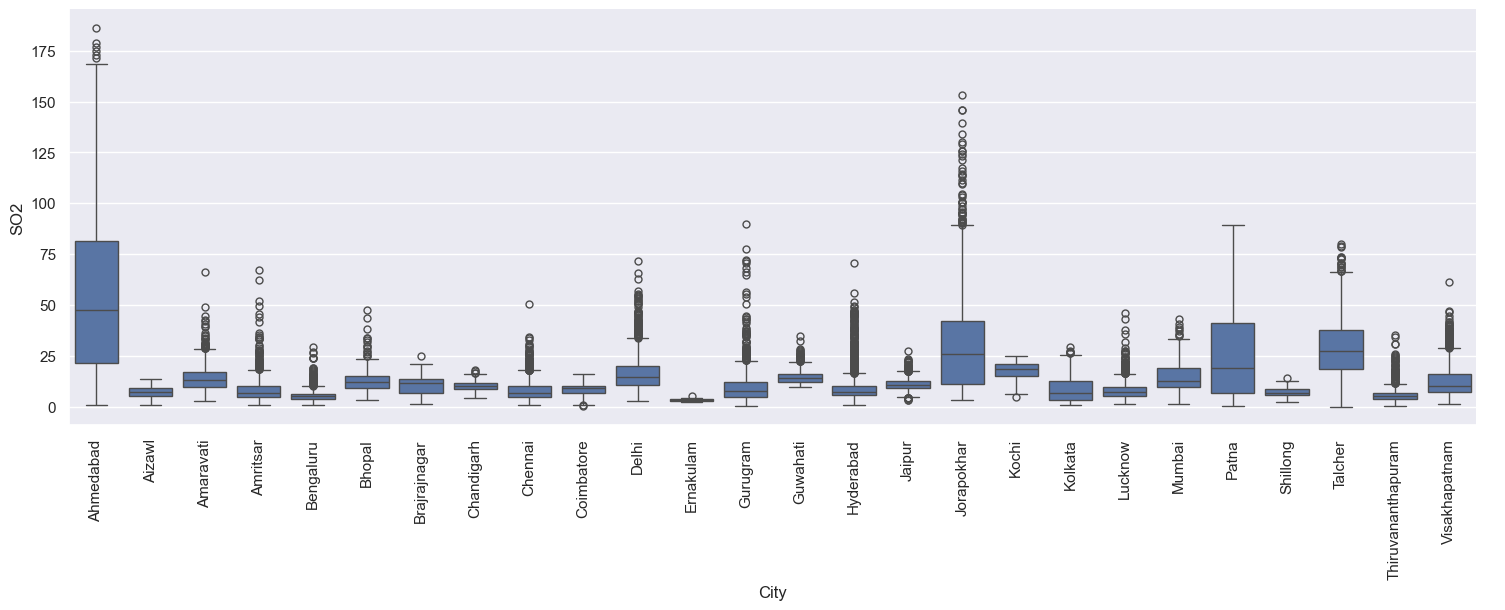

In [32]:
sns.set_style("darkgrid")
sns.catplot(x="City", y="SO2", kind="box", data=df, height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

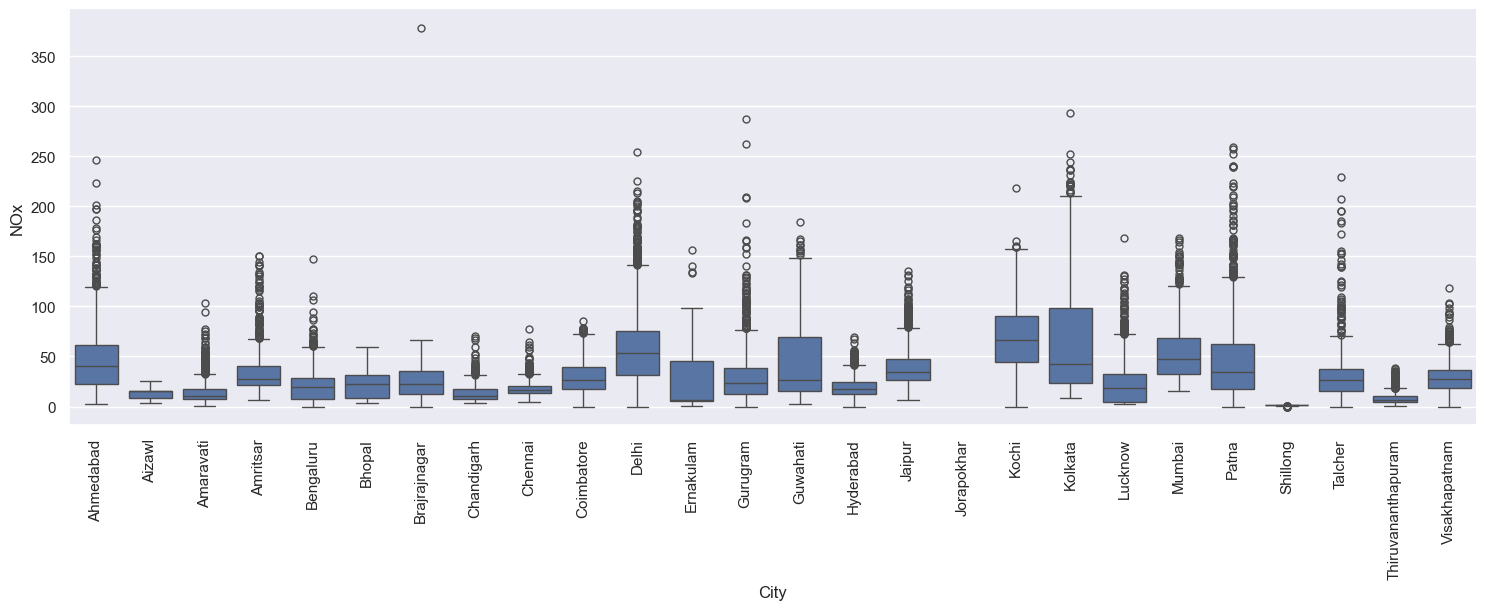

In [33]:
sns.set_style("darkgrid")
sns.catplot(x="City", y="NOx", kind="box", data=df, height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

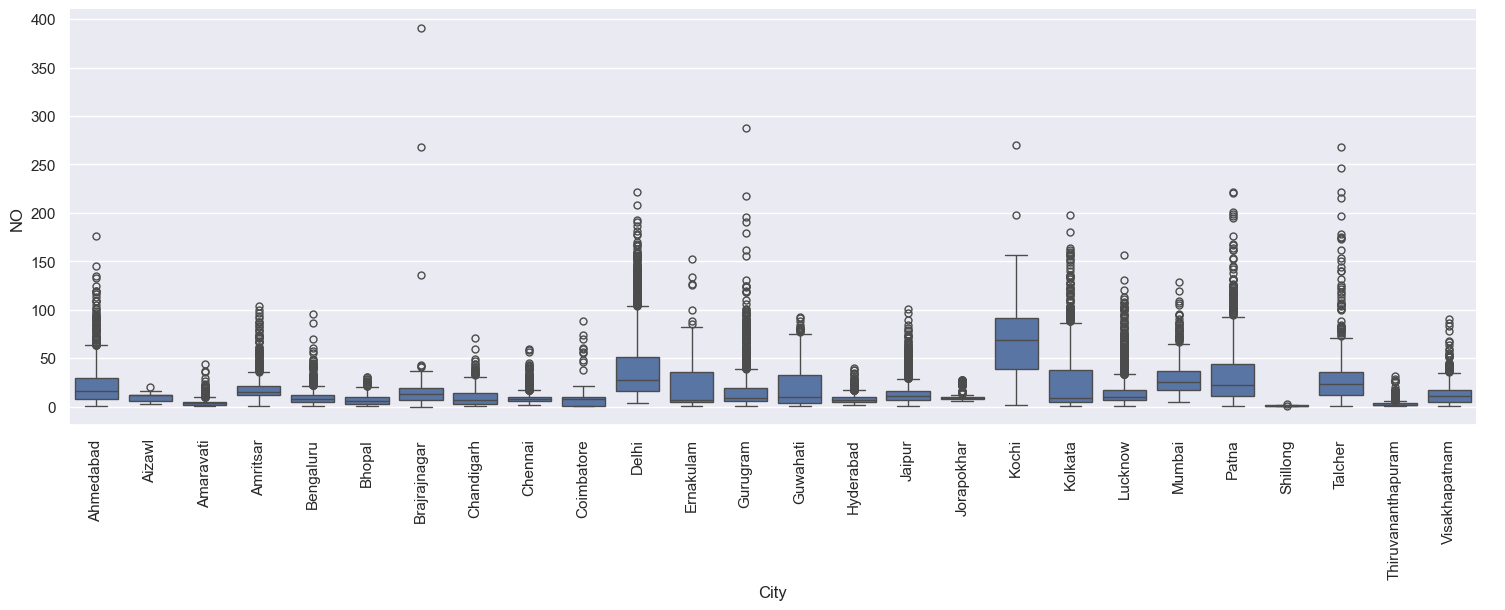

In [34]:
sns.set_style("darkgrid")
sns.catplot(x="City", y="NO", kind="box", data=df, height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

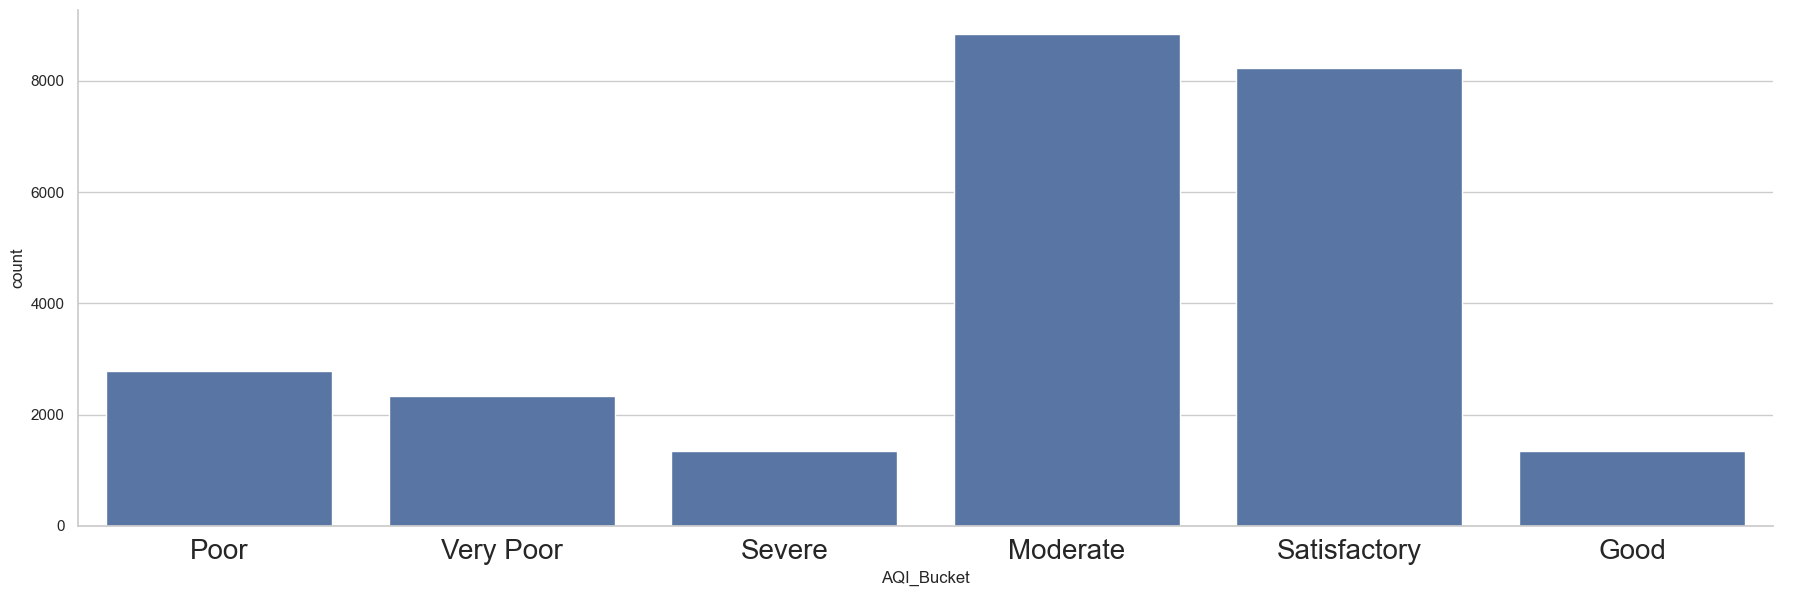

In [35]:
sns.set_style("whitegrid")
sns.catplot(x="AQI_Bucket", kind="count", data=df, height=6, aspect=3)
plt.xticks(fontsize=20)
plt.show()

The plot below illustrates the frequency distribution of different categories within the AQI_Bucket variable.








### Identifying and Handling Missing Values
To identify and handle missing values, we first check for null or missing data in the dataset using functions like isnull() or isna(). Once missing values are detected, we can handle them by either dropping the rows/columns with missing data or imputing the missing values. Imputation methods can include replacing missing values with the mean, median, mode, or using more advanced techniques like interpolation. The choice of handling method depends on the nature of the data and the analysis requirements, ensuring that missing data does not affect the accuracy of the model or analysis.

In [36]:
missing_values = df.isnull().sum().sort_values(ascending=False).to_frame('Missing Count')
missing_values['% Missing Values'] = round((missing_values['Missing Count'] / len(df)) * 100, 2)
print(missing_values)

            Missing Count  % Missing Values
Xylene              15372             61.86
PM10                 7086             28.52
NH3                  6536             26.30
Toluene              5826             23.44
Benzene              3535             14.23
NOx                  1857              7.47
O3                    807              3.25
PM2.5                 678              2.73
SO2                   605              2.43
CO                    445              1.79
NO2                   391              1.57
NO                    387              1.56
City                    0              0.00
Date                    0              0.00
AQI                     0              0.00
AQI_Bucket              0              0.00


In the dataset, we handled the missing values by replacing them with the mean of the respective features.

In [37]:
# Replacing missing values (NaN) in specific columns with the mean of those features
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)
df['NO'].fillna(df['NO'].mean(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['NOx'].fillna(df['NOx'].mean(), inplace=True)
df['NH3'].fillna(df['NH3'].mean(), inplace=True)
df['CO'].fillna(df['CO'].mean(), inplace=True)
df['SO2'].fillna(df['SO2'].mean(), inplace=True)
df['O3'].fillna(df['O3'].mean(), inplace=True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace=True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace=True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace=True)

In [38]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

We delete AQI_Bucket from the dataset because it is not a feature that affects air quality

In [39]:
df = df.drop(["AQI_Bucket"], axis=1)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


### Identifying and Handling Outliers
To detect and handle outliers, we can use statistical methods such as the IQR (Interquartile Range) or Z-score. Outliers can be identified by analyzing values that fall outside a specified range (e.g., below the first quartile or above the third quartile in the IQR method) or by calculating the Z-score for each data point. Once detected, outliers can be treated by either removing or replacing them with more reasonable values, such as the median or mean, depending on the context of the analysis. This process helps ensure that extreme values do not distort the results of your analysis or modeling.

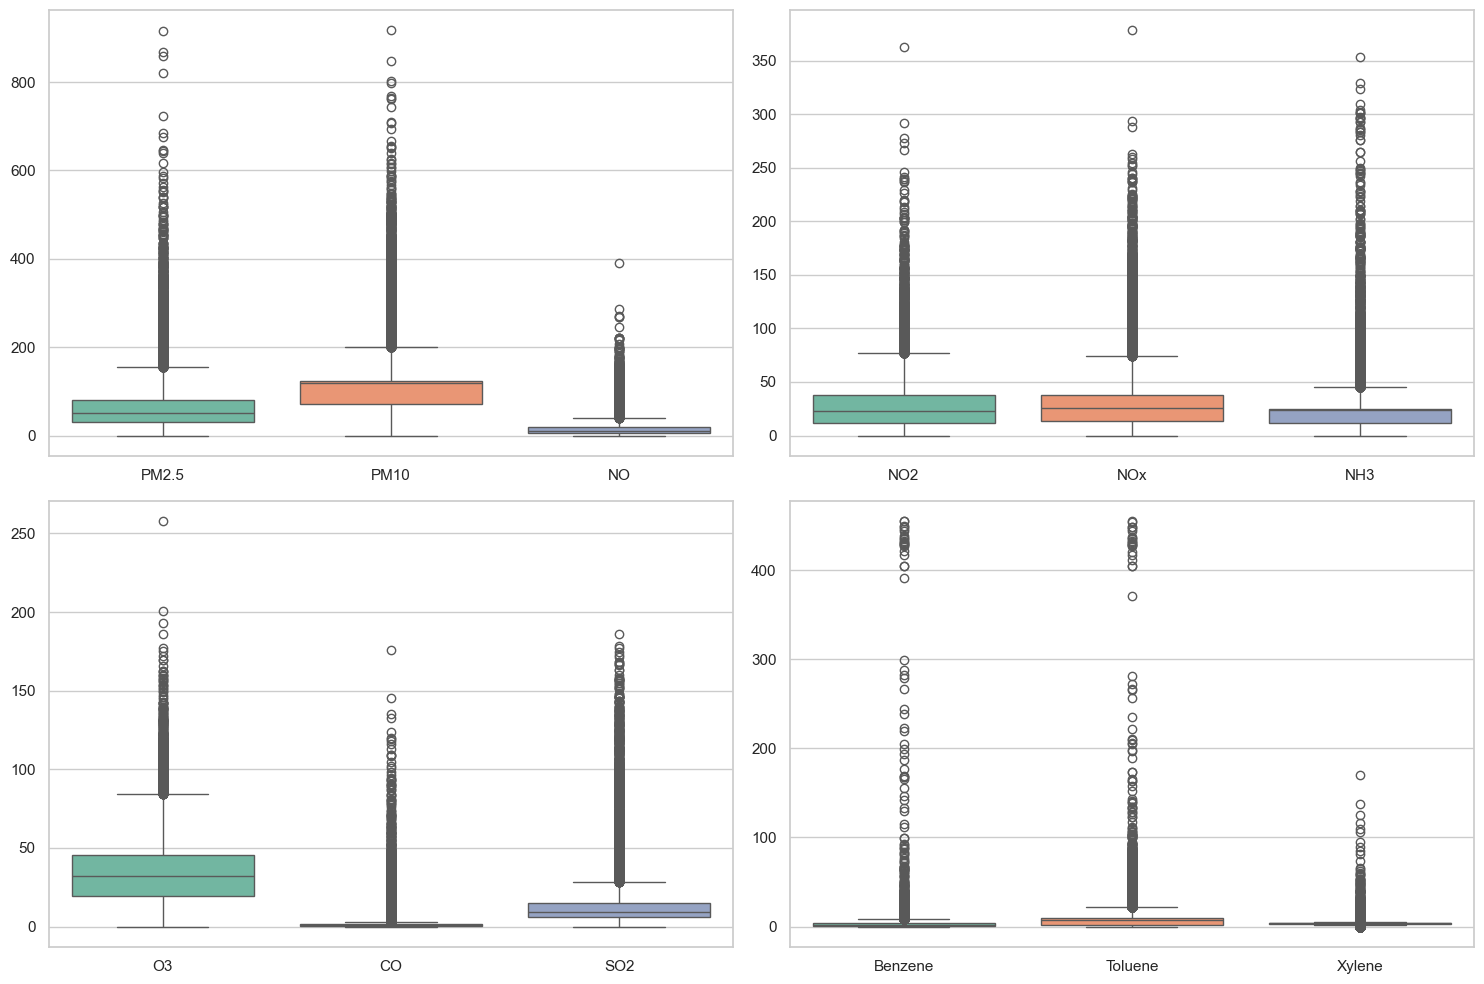

In [40]:
sns.set(style="whitegrid")  
palette = "Set2" 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df[['PM2.5', 'PM10','NO']], ax=axes[0, 0], palette=palette)
sns.boxplot(data=df[['NO2','NOx', 'NH3']], ax=axes[0, 1], palette=palette)
sns.boxplot(data=df[['O3', 'CO', 'SO2']], ax=axes[1, 0], palette=palette)
sns.boxplot(data=df[['Benzene', 'Toluene', 'Xylene']], ax=axes[1, 1], palette=palette)
plt.tight_layout()
plt.show()


We identified a significant presence of outliers in our independent variables, which could lead to inaccurate modeling results. To maintain the integrity of the analysis, we used the statistical method of Interquartile Range (IQR) to address and modify these outliers.

In [41]:
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:  # Loop through all numeric columns in the DataFrame
        Q1 = df[column].quantile(0.25)  # Calculate the first quartile (Q1)
        Q3 = df[column].quantile(0.75)  # Calculate the third quartile (Q3)
        IQR = Q3 - Q1  # Compute the Interquartile Range (IQR)
        
        lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
        
        # For each column, we identify outliers and replace them with Q1 or Q3. 
        # We use the clip function to replace values that are outside the lower or upper bounds.
        # If the value is below the lower bound, it is replaced with Q1.
        # If the value is above the upper bound, it is replaced with Q3.
        # Any value within the bounds remains unchanged.
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df 

df = replace_outliers_with_quartiles(df) 


In [42]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,24850,2018-07-24 18:51:25.714285568,2015-01-01 00:00:00,2017-08-16 00:00:00,2018-11-05 00:00:00,2019-10-11 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24850.0,61.237324,0.04,29.56,50.165,79.5075,154.42875,41.541637
PM10,24850.0,108.929094,0.03,71.78,118.454435,122.9575,199.72375,48.775218
NO,24850.0,14.543704,0.03,5.72,10.075,19.71,40.695,12.028462
NO2,24850.0,27.674746,0.01,12.09,22.535,37.91,76.64,19.647444
NOx,24850.0,29.408656,0.0,14.03,25.72,38.17,74.38,20.512972
NH3,24850.0,21.224648,0.01,11.28,23.848366,24.71,44.855,11.9539
CO,24850.0,1.163066,0.0,0.59,0.95,1.53,2.94,0.810274
SO2,24850.0,11.697545,0.01,5.79,9.43,14.89,28.54,7.838027
O3,24850.0,34.337646,0.01,19.64,32.06,45.3975,84.03375,19.432894


To verify the effectiveness of the outlier handling procedure, we visualize the data distribution using boxplots after the outlier treatment. This will help us assess whether the outliers have been successfully addressed and if the data now shows a more appropriate distribution.

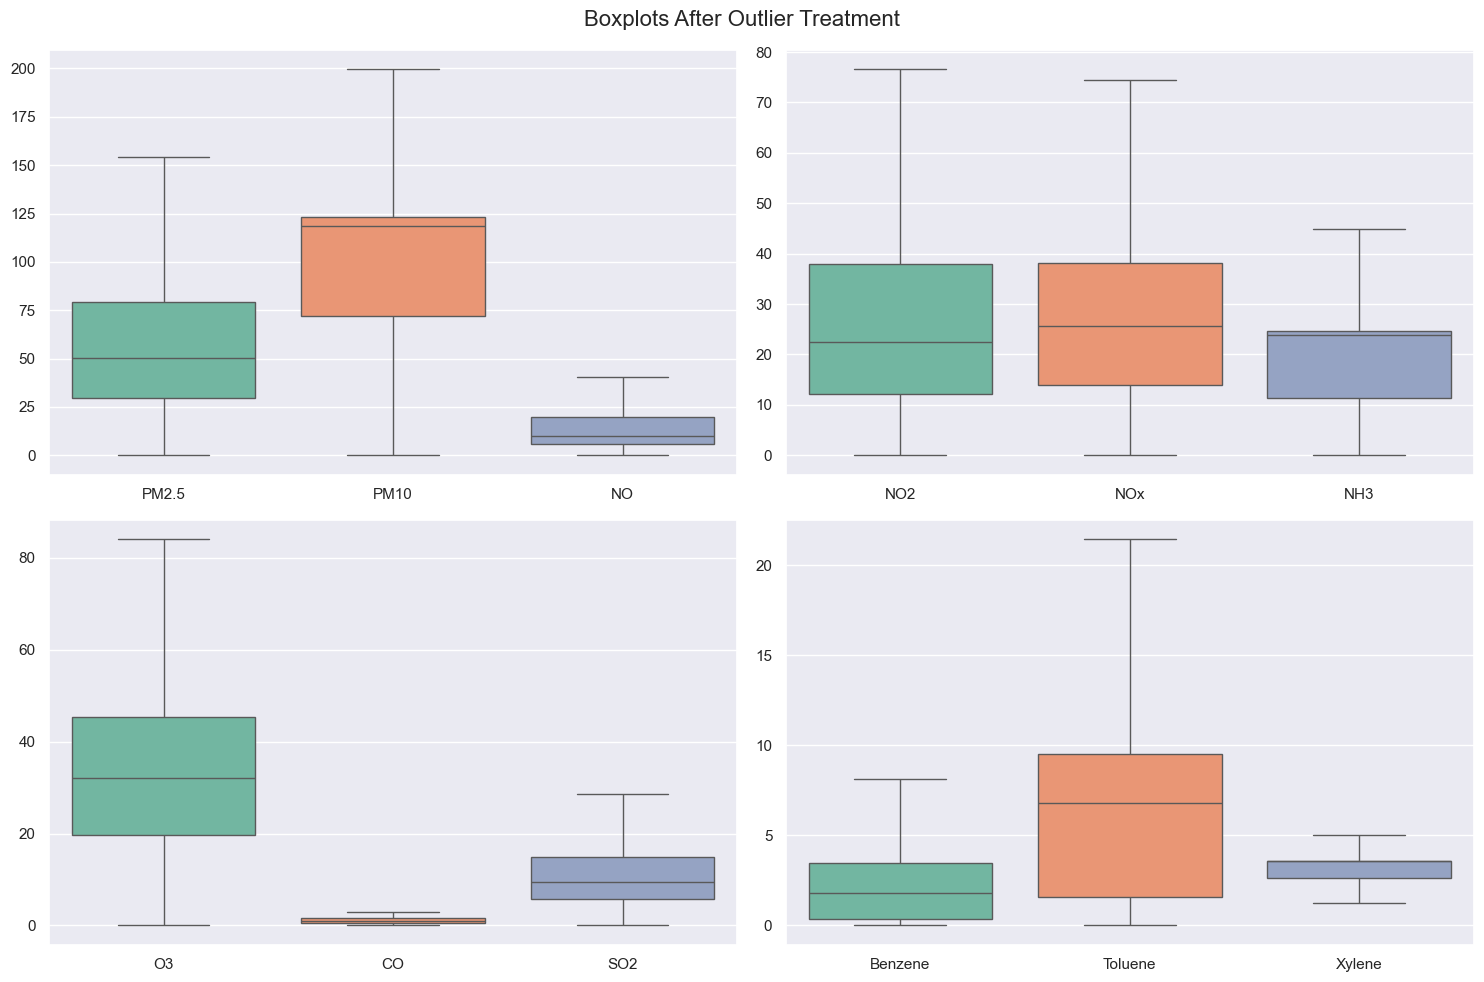

In [43]:
sns.set(style="darkgrid")  
palette = "Set2" 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df[['PM2.5', 'PM10','NO']], ax=axes[0, 0], palette=palette)
sns.boxplot(data=df[['NO2','NOx', 'NH3']], ax=axes[0, 1], palette=palette)
sns.boxplot(data=df[['O3', 'CO', 'SO2']], ax=axes[1, 0], palette=palette)
sns.boxplot(data=df[['Benzene', 'Toluene', 'Xylene']], ax=axes[1, 1], palette=palette)
plt.suptitle("Boxplots After Outlier Treatment", fontsize=16)
plt.tight_layout()
plt.show()


### Multivariate analysis

In [44]:
df1 = df.drop('City', axis=1)

In [45]:
print(df1.corr())

             Date     PM2.5      PM10        NO       NO2       NOx       NH3  \
Date     1.000000 -0.246975 -0.225968 -0.008186 -0.097395  0.015514 -0.255377   
PM2.5   -0.246975  1.000000  0.658907  0.466931  0.444951  0.457536  0.341314   
PM10    -0.225968  0.658907  1.000000  0.439079  0.432332  0.462553  0.358055   
NO      -0.008186  0.466931  0.439079  1.000000  0.524358  0.782621  0.275222   
NO2     -0.097395  0.444951  0.432332  0.524358  1.000000  0.631616  0.354895   
NOx      0.015514  0.457536  0.462553  0.782621  0.631616  1.000000  0.251998   
NH3     -0.255377  0.341314  0.358055  0.275222  0.354895  0.251998  1.000000   
CO      -0.237567  0.358963  0.284255  0.329421  0.271991  0.325470  0.178888   
SO2      0.088550  0.249982  0.300110  0.328602  0.326773  0.298302  0.061631   
O3      -0.045778  0.204037  0.228623 -0.019042  0.311046  0.068127  0.148634   
Benzene  0.000488  0.183083  0.202437  0.242873  0.274563  0.281723  0.022384   
Toluene  0.098885  0.209409 

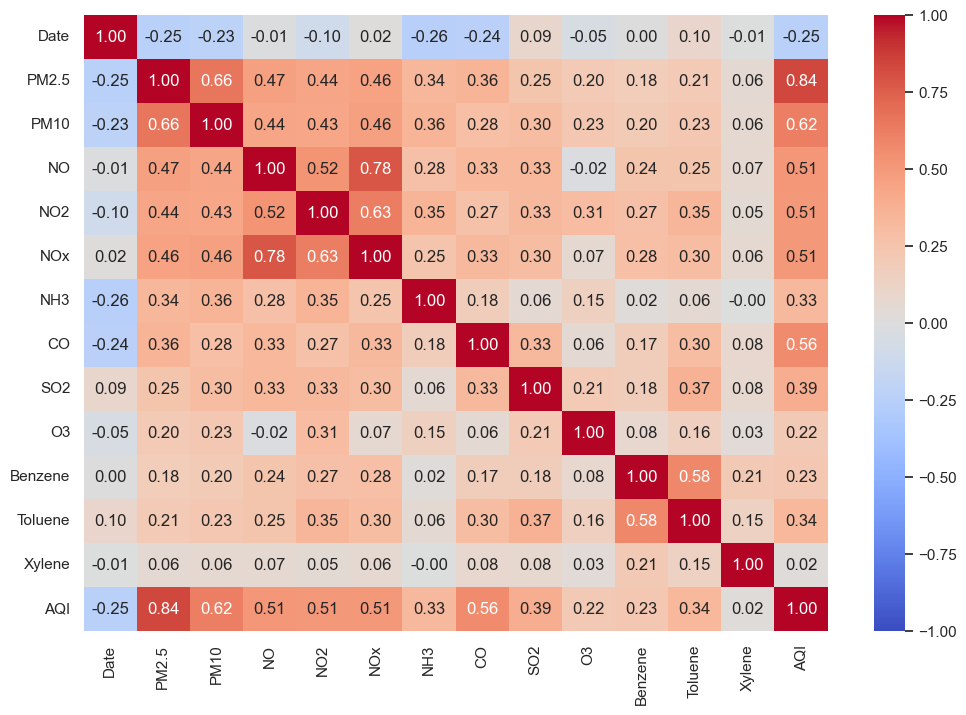

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

The most important variables affecting the AQI value appear to be PM2.5, PM10, CO and NOx.We will make predictions based on data above 0.25

### Data Preprocessing: Handling Missing Values, Encoding, and Splitting
The dataset consists of both numerical and categorical columns. First, we identify these columns separately. For the missing values in numerical columns, we fill them using a scaling technique. Categorical features are transformed using One-Hot Encoding to convert them into a format suitable for machine learning models. Next, we split the data into training, testing, and validation sets. Finally, we define the input features and target variable for each dataset.

In [47]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13000,118.454435,6.930,28.71,33.72,23.848366,2.94,28.54,59.76000,0.02,0.00,3.140000,209.0
29,Ahmedabad,2015-01-30,79.84000,118.454435,13.850,28.68,41.08,23.848366,2.94,28.54,84.03375,0.04,0.00,4.810000,328.0
30,Ahmedabad,2015-01-31,94.52000,118.454435,24.390,32.66,52.61,23.848366,2.94,28.54,84.03375,0.24,0.01,4.996708,398.5
31,Ahmedabad,2015-02-01,135.99000,118.454435,40.695,42.08,74.38,23.848366,2.94,28.54,84.03375,0.40,0.04,4.996708,398.5
32,Ahmedabad,2015-02-02,154.42875,118.454435,40.695,35.31,72.80,23.848366,2.94,28.54,84.03375,0.46,0.06,4.996708,398.5


In [48]:
# Dropping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)        # We remove the 'Date' column as it's not needed for our analysis.
df.drop(['City'], axis=1, inplace=True)        # We remove the 'City' column because we are focusing on other parameters, not location.

In [49]:
from sklearn.preprocessing import StandardScaler
# Using StandardScaler to scale the features so that they have a mean of 0 and standard deviation of 1.
# We use StandardScaler to make sure all the features are on the same scale. 
# This helps some machine learning models work better by making sure no feature is too big or too small compared to others.
df1 = StandardScaler().fit_transform(df)


In [50]:
df1

array([[ 0.52701621,  0.19529452, -0.63298676, ..., -1.13628147,
        -0.02279349,  0.49733874],
       [ 0.44781697,  0.19529452, -0.05767303, ..., -1.13628147,
         1.49590673,  1.64302443],
       [ 0.80120448,  0.19529452,  0.81859962, ..., -1.1347432 ,
         1.66569939,  2.32177099],
       ...,
       [-0.92264288, -0.88569494, -0.92230638, ..., -1.1347432 ,
        -1.74885987, -0.86015438],
       [-1.07357883, -1.20881635, -0.87242369, ..., -1.13628147,
        -1.74885987, -0.99494094],
       [-1.11305808, -0.88015923, -1.17587674, ...,  0.32903067,
         0.38523967, -1.03345138]])

In [51]:
df = pd.DataFrame(df1,columns = df.columns)

In [52]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.527016,0.195295,-0.632987,0.052693,0.210181,0.219491,2.193046,2.148856,1.308239,-1.023462,-1.136281,-0.022793,0.497339
1,0.447817,0.195295,-0.057673,0.051166,0.568985,0.219491,2.193046,2.148856,2.557370,-1.014744,-1.136281,1.495907,1.643024
2,0.801204,0.195295,0.818600,0.253741,1.131080,0.219491,2.193046,2.148856,2.557370,-0.927571,-1.134743,1.665699,2.321771
3,1.799500,0.195295,2.174162,0.733202,2.192381,0.219491,2.193046,2.148856,2.557370,-0.857832,-1.130128,1.665699,2.321771
4,2.243371,0.195295,2.174162,0.388621,2.115355,0.219491,2.193046,2.148856,2.557370,-0.831679,-1.127052,1.665699,2.321771


### Data Modeling

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
# Data Preparation for Modeling: Selecting Features(x) and Target Variable(y)
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [55]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.527016,0.195295,-0.632987,0.052693,0.210181,0.219491,2.193046,2.148856,1.308239,-1.023462,-1.136281,-0.022793
1,0.447817,0.195295,-0.057673,0.051166,0.568985,0.219491,2.193046,2.148856,2.557370,-1.014744,-1.136281,1.495907
2,0.801204,0.195295,0.818600,0.253741,1.131080,0.219491,2.193046,2.148856,2.557370,-0.927571,-1.134743,1.665699
3,1.799500,0.195295,2.174162,0.733202,2.192381,0.219491,2.193046,2.148856,2.557370,-0.857832,-1.130128,1.665699
4,2.243371,0.195295,2.174162,0.388621,2.115355,0.219491,2.193046,2.148856,2.557370,-0.831679,-1.127052,1.665699


In [56]:
y.head()

0    0.497339
1    1.643024
2    2.321771
3    2.321771
4    2.321771
Name: AQI, dtype: float64

In [57]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# 80% of the data will be used for training, 20% for testing. The random_state ensures reproducibility.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=70)
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")
print(f"Training Target Shape: {Y_train.shape}, Testing Target Shape: {Y_test.shape}")


Training Data Shape: (19880, 12), Testing Data Shape: (4970, 12)
Training Target Shape: (19880,), Testing Target Shape: (4970,)


### Model Building with Regression Algorithm

#### Linear Regression

In [58]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [59]:
# Predicting on train and test data
train_pred, test_pred = model.predict(X_train), model.predict(X_test)

In [60]:
# Calculating RMSE for training and test data
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, test_pred))

# Displaying results
print(f"RMSE Training Data: {RMSE_train:.4f}")
print(f"RMSE Test Data: {RMSE_test:.4f}")
print('-' * 50)

# Displaying R-squared values
print(f'R-Squared Training Data: {model.score(X_train, Y_train):.4f}')
print(f'R-Squared Test Data: {model.score(X_test, Y_test):.4f}')


RMSE Training Data: 0.4339
RMSE Test Data: 0.4390
--------------------------------------------------
R-Squared Training Data: 0.8120
R-Squared Test Data: 0.8062


#### K-Nearest Neighbours

In [61]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [62]:
# Predicting on train and test data
train_pred1, test_pred1 = model.predict(X_train), model.predict(X_test)

In [63]:
RMSE_train= np.sqrt(metrics.mean_squared_error(Y_train,train_pred1))
RMSE_test= np.sqrt(metrics.mean_squared_error(Y_test,test_pred1))
print(f"RMSE TrainingData: {RMSE_train:.4f}")
print(f"RMSE TestData: {RMSE_test:.4f}")
print('-'*50)
print(f'R-Squared Training Data: {model.score(X_train, Y_train):.4f}')
print(f'R-Squared Test Data: {model.score(X_test, Y_test):.4f}')


RMSE TrainingData: 0.4339
RMSE TestData: 0.4390
--------------------------------------------------
R-Squared Training Data: 0.8120
R-Squared Test Data: 0.8062


#### Decision Tree Regressor

In [64]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [65]:
# Predicting on train and test data
train_pred2, test_pred2 = DT.predict(X_train), DT.predict(X_test)

In [66]:
RMSE_train=np.sqrt(metrics.mean_squared_error(Y_train,train_pred2))
RMSE_test=np.sqrt(metrics.mean_squared_error(Y_test,test_pred2))
print(f"RMSE TrainingData: {RMSE_train:.4f}")
print(f"RMSE TestData: {RMSE_test:.4f}")
print('-'*50)
print(f'R-Squared Training Data: {DT.score(X_train, Y_train):.4f}')
print(f'R-Squared Test Data: {DT.score(X_test, Y_test):.4f}')

RMSE TrainingData: 0.0312
RMSE TestData: 0.3975
--------------------------------------------------
R-Squared Training Data: 0.9990
R-Squared Test Data: 0.8411


#### Random Forest Regressor

In [67]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [68]:
#predicting train and test data
train_pred3, test_pred3 =RF.predict(X_train), RF.predict(X_test)

In [69]:
RMSE_train=np.sqrt(metrics.mean_squared_error(Y_train,train_pred3))
RMSE_test=np.sqrt(metrics.mean_squared_error(Y_test,test_pred3))
print(f"RMSE TrainingData: {RMSE_train:.4f}")
print(f"RMSE TestData: {RMSE_test:.4f}")
print('-'*50)
print(f'R-Squared Training Data: {RF.score(X_train, Y_train):.4f}')
print(f'R-Squared Test Data: {RF.score(X_test, Y_test):.4f}')

RMSE TrainingData: 0.1081
RMSE TestData: 0.2774
--------------------------------------------------
R-Squared Training Data: 0.9883
R-Squared Test Data: 0.9226


In [70]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(RF, file)  # Replace RF with your trained model


### Model Accuracy Result
Among the algorithms tested, Random Forest stands out with the highest R² score of 0.9882 on the training data and 0.9222 on the test data.

Training R² Score:
The training R² score of 97.76% indicates that the model successfully explains a significant portion (97.76%) of the variance in the target variable for the training data. This suggests that the model performed well in predicting air quality variables during training, capturing a large proportion of the data's underlying patterns.

Test R² Score:
The R² score for the test data is 84.72%, meaning the model was able to explain 84.72% of the variance in the target variable on previously unseen data. This high performance on test data suggests that the model generalizes well and is capable of providing accurate predictions for new air quality data, demonstrating strong predictive power.

